## read data and tokenize
1, stemming or lemmatize tokenizer<br>
2, HashingVectorizer or CountVectorizer<br>
3, remove english stopwords

In [1]:
import csv
import nltk
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np

## read text data from file
labelList = []
smsList = []
with open('train.csv', encoding='latin-1') as trainfile:
    reader = csv.reader(trainfile)
    for row in reader:
        if row[0] == 'ham':
            labelList.append(1)
        elif row[0] == 'spam':
            labelList.append(0)
        else:
            ;
            
        if row[1] == 'sms':
            ;
        else:
            smsList.append(row[1])

## no punctuation and lower case
corpus = []
for sms in smsList:
    corpus.append(sms.lower().translate(str.maketrans('','',string.punctuation)))

## vectorize and tfidf transformation
    
# two ways of tokenization
# 1, stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def stem_tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

# 2, lemmatize
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
#vectorizer = CountVectorizer(tokenizer = stem_tokenize, stop_words = 'english')
#vectorizer = CountVectorizer(tokenizer = LemmaTokenizer(), stop_words = 'english')
#countsArray = vectorizer.fit_transform(corpus).toarray()

#hv = HashingVectorizer(n_features=2**16, tokenizer = LemmaTokenizer(), stop_words = 'english', ngram_range=(1, 2))
#countsArray = hv.fit_transform(corpus).toarray()

#transformer = TfidfTransformer()
#tfs=transformer.fit_transform(countsArray).toarray()

## tfidf vectorizer
tfidfvectorizer = TfidfVectorizer(tokenizer = LemmaTokenizer(), stop_words = 'english')
x=tfidfvectorizer.fit_transform(corpus).toarray()
print(x.shape)

# label array
t = np.asarray(labelList) # 1: ham 0: spam 
print(t.shape)

(3000, 6139)
(3000,)


## settings

In [2]:
# setting learning rate
lr = 0.0001
alpha = 0.9

# setting lambda and iternum
lambdaa = 0.1
iternum = 1

# size of the matrix
M = x.shape[1] + 1
N = x.shape[0]

# adding bias term to the last column of x
temp = np.ones((N,M))
temp[ :, : - 1] = x
x = temp

# initializing w
w = np.zeros(M)

print(M)
print(N)

6140
3000


## 10-fold train-validation find lambda
1, lambda loop<br>
2, 10-fold loop<br>
3, train loop<br>
4, find error, draw graph<br>

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


lambda is 0.000000, error of train is 5.307234, error of validation is 2.122276
lambda is 0.000000, error of train is 5.307234, error of validation is 2.122276
lambda is 0.000000, error of train is 5.307233, error of validation is 2.122276
lambda is 0.000000, error of train is 5.307231, error of validation is 2.122275
lambda is 0.000001, error of train is 5.307206, error of validation is 2.122268
lambda is 0.000010, error of train is 5.306955, error of validation is 2.122195
lambda is 0.000100, error of train is 5.304452, error of validation is 2.121467
lambda is 0.001000, error of train is 5.279502, error of validation is 2.114241
lambda is 0.010000, error of train is 5.157202, error of validation is 1.939478
lambda is 0.100000, error of train is 14.645513, error of validation is 2.280636


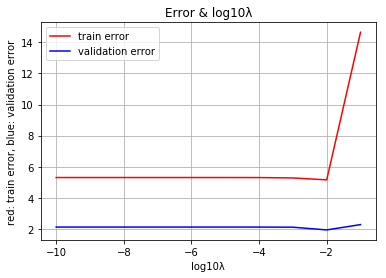

In [6]:
#train
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(n_splits = 10)

lambda_num = 10
lambdaList = np.logspace(-10, -1, lambda_num)

error_t=[]
error_v=[]

eta = 0.1

for lambdaa in lambdaList:
    # for each lambdaa
    error_train = 0
    error_valid = 0
    
    for train, valid in kf.split(x):
        # for each fold, use a new w
        w = np.zeros(M)
        
        # split the set into four
        x_train, x_valid, t_train, t_valid = x[train], x[valid], t[train], t[valid]
        
        # train!!
        for iternum in range(1,100):
            # y
            y = 1 / (1 + np.exp( -np.dot(x_train, w)))

            # bias term
            regu = lambdaa * w
            regu[-1] = 0
            
            # gradients
            gradients = np.dot(y - t_train, x_train) + regu

            # update eta
            w = w - eta * gradients

            # cal error
            error_train = - np.log(y[t_train==1]).sum()
            error_train += - np.log(1 - y[t_train==0]).sum()
            
        # end of train
        
        # valid!!
        y = 1 / (1 + np.exp( -np.dot(x_valid,w)))
        error_valid = - np.log(y[t_valid==1]).sum()
        error_valid += - np.log(1 - y[t_valid==0]).sum()
        
    # end of fold

    error_train /= 10
    error_valid /= 10
    
    print('lambda is %f, error of train is %f, error of validation is %f' % (lambdaa, error_train, error_valid))

    error_train = error_train.reshape(1)
    error_valid = error_valid.reshape(1)
    
    error_t.append(error_train)
    error_v.append(error_valid)

lambdaLogList = np.log10(lambdaList)

plt.title('Error & log10\u03BB')
plt.xlabel('log10\u03BB')
plt.ylabel('red: train error, blue: validation error')
plt.plot(lambdaLogList.tolist(), error_t, color="red", label="train error")
plt.plot(lambdaLogList.tolist(), error_v, color="blue", label="validation error")
plt.grid(True)
plt.legend()
plt.show() 

## batch gradient descent logistic regression
1, calculate prediction y<br>
2, updating w<br>
3, updating eta<br>
4, calculate error<br>
5, test train set prediction percentage

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


iteration 100, error 336.804788
iteration 200, error 197.894505
iteration 300, error 131.246544
iteration 400, error 85.403531
iteration 500, error 57.715814
iteration 600, error 39.716815
iteration 700, error 27.274140
iteration 800, error 19.589038
iteration 900, error 13.518880
iteration 1000, error 10.008471
iteration 1100, error 6.755279
iteration 1200, error 5.142684
iteration 1300, error 3.453779
iteration 1400, error 2.687324
iteration 1500, error 1.798851
iteration 1600, error 1.424856
iteration 1700, error 0.956555
iteration 1800, error 0.769095
iteration 1900, error 0.519815
iteration 2000, error 0.423951


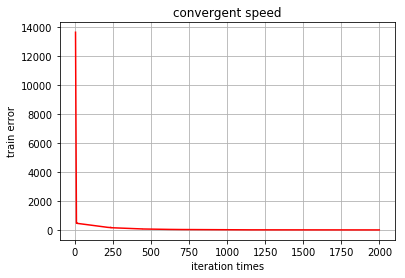

Correct prediction : 1.0


In [8]:
## batch gradient descent logistic regression

# initializing
w = np.zeros(M)
lambdaa = 0.00001

error = 0
oldError = 10000000

eta = 0.1

# picture init
import matplotlib.pyplot as plt
error_list=[]
iter_list=[]

# main loop
for iternum in range(2000):
    # y
    y= 1 / (1 + np.exp( -np.dot(x,w)))
    
    # bias term
    regu = lambdaa * w
    regu[-1] = 0
            
    # gradients
    gradients = np.dot(y - t,x) + regu
     
    # update eta
    w = w - eta * gradients
    
    # cal error
    error = - np.log(y[t==1]).sum()
    error += - np.log(1 - y[t==0]).sum()
    
    # update eta
    if error < oldError:
        eta=eta*1.01
    else:
        eta=eta*0.5
    oldError = error
              
    error_list.append(error.reshape(1))
    iter_list.append(iternum)
        
    if (iternum+1)%100 == 0:
        print('iteration %d, error %f' % (iternum+1,error))

# convergent speed
plt.title('convergent speed')
plt.xlabel('iteration times')
plt.ylabel('train error')
plt.plot(iter_list, error_list, color="red")
plt.grid(True)
plt.show()

# correctness percentage
correctNum = 0
for i in range(N - 1):
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
        correctNum += 1 

print ('Correct prediction : {}'.format (correctNum / (N - 1)))

## read test data
1, tokenize in the exact same way as train data

In [12]:
## read test data from file
labelList_test = []
smsList = []
with open('test.csv', encoding='latin-1') as trainfile:
    reader = csv.reader(trainfile)
    for row in reader:
        if row[0] == 'ham':
            labelList_test.append(1)
        elif row[0] == 'spam':
            labelList_test.append(0)
        else:
            ;
            
        if row[1] == 'sms':
            ;
        else:
            smsList.append(row[1])

## no punctuation and lower case
corpus = []
for sms in smsList:
    corpus.append(sms.lower().translate(str.maketrans('','',string.punctuation)))
x_test = tfidfvectorizer.transform(corpus).toarray()
print(x_test.shape)

t_test = np.asarray(labelList_test) #1:ham 0:spam    
print(t_test.shape)

(2572, 6139)
(2572,)


## test data cross-entropy error and prediction percentage

In [14]:
## predict with test data

# test data dimension
N_test = x_test.shape[0]

# bias term adding
temp = np.ones((N_test, M))
temp[:, :-1] = x_test
x_test = temp

# y
y_test = 1 / (1 + np.exp( -np.dot(x_test, w)))

# cal error
error = - np.log(y_test[t_test==1]).sum()
error += - np.log(1 - y_test[t_test==0]).sum()

print('test error:{}'.format (error))

# correctness percentage
correctNum = 0
for i in range(N_test - 1):
    if (y_test[i] >= 0.5 and t_test[i] == 1) or (y_test[i] < 0.5 and t_test[i] == 0):
        correctNum += 1

print ('Correct prediction : {}'.format (correctNum / (N_test - 1)))

test error:161.36974151698803
Correct prediction : 0.9817191754181253


## Stochastic Gradient descent
1, has a slower convergence speed than batch gradient descent

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


iteration 100, error 342.825234
iteration 200, error 226.754147
iteration 300, error 178.148321
iteration 400, error 135.230978
iteration 500, error 107.273266
iteration 600, error 91.192337
iteration 700, error 76.818686
iteration 800, error 69.051334
iteration 900, error 62.682378
iteration 1000, error 57.822559


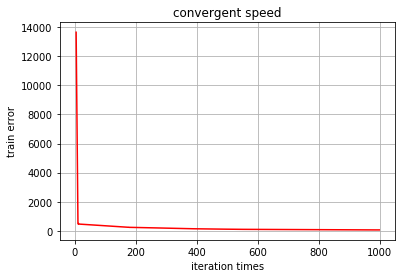

Correct prediction using Stochastic Gradient descent: 0.9817191754181253


In [18]:
## Stochastic Gradient descent logistic regression

# initializing
w = np.zeros(M)
lambdaa = 0.00001

error = 0
oldError = 10000000

eta = 0.1

# picture init
import matplotlib.pyplot as plt
error_list=[]
iter_list=[]

# main loop
for iternum in range(1000):
    # y
    y= 1 / (1 + np.exp( -np.dot(x,w)))
    
    # bias term
    regu = lambdaa * w
    regu[-1] = 0
    
    # Stochastic
    j = np.random.permutation(N)
    
    for i in range(N - 1):
        # gradients
        gradients=((y[j[i]] - t[j[i]]) * x[j[i]]) + regu
        
        # update eta
        w = w - eta * gradients
    
    # cal error
    error = - np.log(y[t==1]).sum()
    error += - np.log(1 - y[t==0]).sum()
    
    # update eta
    if error < oldError:
        eta=eta*1.01
    else:
        eta=eta*0.5
    oldError = error
              
    error_list.append(error.reshape(1))
    iter_list.append(iternum)
        
    if (iternum+1)%100 == 0:
        print('iteration %d, error %f' % (iternum+1,error))

# convergent speed
plt.title('convergent speed')
plt.xlabel('iteration times')
plt.ylabel('train error')
plt.plot(iter_list, error_list, color="red")
plt.grid(True)
plt.show()

# y
y_test = 1 / (1 + np.exp( -np.dot(x_test, w)))

# correctness percentage
correctNum = 0
for i in range(N_test - 1):
    if (y_test[i] >= 0.5 and t_test[i] == 1) or (y_test[i] < 0.5 and t_test[i] == 0):
        correctNum += 1

print ('Correct prediction using Stochastic Gradient descent: {}'.format (correctNum / (N_test - 1)))

## EG+-

In [ ]:
## EG+-

eta = 0.0001

error = 0
oldError = 10000000

w_p = np.ones(M - 1) / (M - 1)
w_n = np.zeros(M - 1)

for iternum in range(1, 100):
    #y
    y = np.dot((w_p - w_n), x[:,:-1].T)      
    
    #r
    r_p = np.exp( - eta * np.dot(( y - t ), x[:,:-1]))
    r_n = 1 / r_p
    
    #w
    w_p = ( w_p * r_p ) / ( w_p * r_p + w_n * r_n ).sum()
    w_n = ( w_n * r_n ) / ( w_p * r_p + w_n * r_n ).sum()
    
    # error
    sigoidy = 1 / (1 + np.exp(-y))
    error = - np.log(sigoidy[t==1]).sum()
    error += - np.log(1 - sigoidy[t==0]).sum()
    
    # update eta
    #if error < oldError:
    #    eta=eta*1.01
    #else:
    #    eta=eta*0.5
    #oldError = error
    
    if (iternum+2)%10== 0:
        print('iteration %d, error %f' % (iternum+2,error))

# test
y_test_eg = np.dot(( w_p - w_n ), x_test[:,:-1].T)

# error
error = - np.log(y_test_eg[t_test==1]).sum()
error += - np.log(1 - y_test_eg[t_test==0]).sum()

print('test error:{}'.format (error))

# correctness percentage
correctNum = 0
for i in range(N_test - 1):
    if (y_test_eg[i] >= 0.5 and t_test[i] == 1) or (y_test_eg[i] < 0.5 and t_test[i] == 0):
        correctNum += 1

print ('Correct prediction using EG+-: {}'.format (correctNum / (N_test - 1)))

